# Exercises and Homework for week 5

## physics725: Scientific Programming with Python (SS 2024)

Oliver Cordes & Thomas Erben

---

Homework is due on **Thursday, 16/05/2024, 11:55pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `zip`-archive with the naming scheme provided by your tutor.

**Topics of this exercise:**
 * Working with multidimensional `numpy`-arrays 

**Your group number here please:**  Group XX

## 1. Lecture Review (0 points)

If you did the lecture review questions [05_Review_questions.ipynb](05_Review_questions.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

---

## 2. Random Walk (15 points)

We consider the one dimensional random walk. Starting from $x=0$ we walk in each time step a random step to the left or to the right with equal propability. We would like to estimate the quantities $\langle d(t)\rangle$ and $\langle d(t)^2\rangle$, where $d(t)$ is the distance from the origin at time $t$ after $N$ steps. With a simulation, we want to confirm known results from statistical mechanics:

$$
\langle d(t)\rangle = 0
$$
and
$$
\langle d(t)^2\rangle = N
$$


<img src="figs/random_walk.png" style="width: 300px;" style="height: 200px;">  

**Task:**

Obtain the desired quantities by simulating 1000 walkers and 200 time steps.

**Hints:**
 * create a two-dimensional array with the walking stories of each worker in one direction and time in the other (see left side of the following figure)
 * the function `np.random.randint` allows you directly to create a 2D-array of random numbers)
 * use the created array to obtain another array containing $d(t)$ for each walker ($d(t)$ is just the cumulated sum of the individual steps; see right side of the following figure) (see `np.cumsum`)
 * obtain $\langle d(t)\rangle$ and $\langle d(t)^2\rangle$ and plot the quantities (applicate `np.mean` function along the stories-axis)

<img src="figs/random_walk_schema.png" style="width: 600px;" style="height: 300px;">  

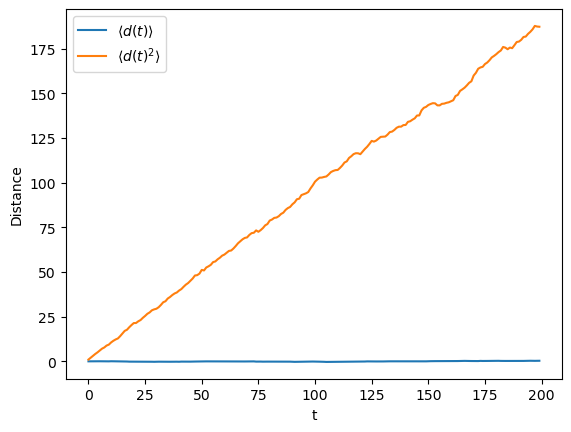

In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt


num_walkers = 1000
num_steps = 200


steps = np.random.choice([-1, 1], size=(num_walkers, num_steps))


distances = np.cumsum(steps, axis=1)

# Calculate mean and mean squared distances
mean_distances = np.mean(distances, axis=0)
mean_squared_distances = np.mean(distances**2, axis=0)

# Plotting
plt.plot(np.arange(num_steps), mean_distances, label=r'$\langle d(t) \rangle$')
plt.plot(np.arange(num_steps), mean_squared_distances, label=r'$\langle d(t)^2 \rangle$')
plt.xlabel('t')
plt.ylabel('Distance')
plt.legend()

---

## 3. Weather temperature prediction (15 points)

Despite of modern techniques in creating weather models to get a almost real prediction of a temperature, you can also think of a simple data mining approach. For many of the regions on earth we have weather stations which feed their data into a global database. These data can be fetched and analyzed. For the temperature prediction we simply have look inside the data to see if we can find a similar temperture trend, so if we can find the same temperature development, we can use the next temperature in the archive as a temperature prediction for the recent temperature. If you find may similar events in the database you can analyse these events. Creating a mean value for all these temperature is in quite naive but gives at least a good starting point for further analysis.

However, this is a simple approach, which neglects all know effects on the temperature development, land scapes, air pressure, clouds, winds, solar power etc. 

I think this is a funny task and one can check how good is this prediction in comparison to the modern models. At least it will take less cpu ressources ;-)

### Weather data

In the internet there is a package called `meteostat` (see https://dev.meteostat.net/python/) which offers you an access to global weather statistic data. If you know the weather station id, you can access different weather data time series. We focus on the hourly data from the weather station `Bonn-Roleber`. At the moment data can be downloaded from January 1st 2016 until now directly. These are the provided data:

```
                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt    pres   
time                                                                           
2016-01-01 00:00:00   4.7   2.1  83.0   0.0   NaN  180.0   9.7   NaN  1024.8  \
2016-01-01 01:00:00   4.3   2.0  85.0   0.0   NaN  200.0  13.3   NaN  1024.9   
2016-01-01 02:00:00   4.7   2.1  83.0   0.0   NaN  190.0  11.5   NaN  1025.2   
2016-01-01 03:00:00   4.6   2.3  85.0   0.0   NaN  190.0  11.9   NaN  1025.4   
2016-01-01 04:00:00   5.0   2.9  86.0   0.0   NaN  200.0  17.6   NaN  1025.1   
...                   ...   ...   ...   ...   ...    ...   ...   ...     ...   
2023-05-04 06:00:00   9.4   4.6  72.0   0.0   NaN  105.0   9.3  16.7  1021.9   
2023-05-04 07:00:00  11.5   5.1  65.0   0.0   NaN  110.0  11.1  18.5  1021.6   
2023-05-04 08:00:00  13.9   5.8  58.0   0.0   NaN  117.0  13.0  22.2  1021.1   
2023-05-04 09:00:00  15.9   6.1  52.0   0.0   NaN  123.0  14.8  25.9  1020.5   
2023-05-04 10:00:00  18.0   5.9  45.0   0.0   NaN  127.0  16.7  27.8  1019.9   
```

For this task only the first column `temp` is interesting for as as well as the index `time`. The following code part, downloads the necessary data and can be used directly in your solution. Have a look at the code, so you can apply the solution to other quantities.

In [1]:
import numpy as np
from datetime import datetime
from meteostat import Hourly


# Set time period, only from 2016 until 2023 is supported
start = datetime(2016, 1, 1)
end = datetime.now()

# Get hourly data
# id: 10519 = Bonn-Roleber

data = Hourly('10519', start, end)
data = data.normalize()    # be sure that all data is available, 
                           # gaps are filled
data = data.fetch()  


# extract the times and the temperature data
# and convert these to numpy arrays
# the data is stored in pandas data frames, 
# which we not have in class so far!
times = data.index.to_numpy()
temps = data['temp'].to_numpy()

The arrays `times` and `temps` are now have necessary data stored in 1d-`numpy`-arrays.

The idea of a temperature prediction is to have a look in the data set if we can find $N$ consecutive values similar to the $N$ last recent values at a point $M$ insisde the archive data. The value $M+1$ follows the same $N$ values and is the *prediction* for the recent value. If more than one $M$ points are found, one can calculate the mean value for the prediction. 

**Task:**

The task is to check the archive data for the occurrence of $N$ consecutive values. Evaluate the points $M$ in the archive data and calculate a predicted value for the temperature from the mean values. A direct search may be without any results, so perform all tests with an inaccuracy of `0.1` degrees. $N=3$ should work. If you have still no results, vary the accuracy and number of data points!

**Hints:**
 * use the *rolling window* technique to split the temperature data array (see *Review questions*)
 * use `np.isclose` and `np.all` to check for the occurences of the test data and collapse the results to a linear array (see *Review questions*)
 * `np.nonzero(...)[0]` gives you an index array for the found data positions; you need to adjust the positions for the predicted values, how?
 * all the tasks can be written with `numpy` commands, use `slicing` and `masks`, loops are not allowed!

In [4]:
# Your solution here please
import numpy as np
from datetime import datetime
from meteostat import Hourly

# Set time period, only from 2016 until 2023 is supported
start = datetime(2016, 1, 1)
end = datetime.now()

# Get hourly data for Bonn-Roleber weather station
data = Hourly('10519', start, end)
data = data.normalize()  # Ensure all data is available, gaps are filled
data = data.fetch()

# Extract the times and the temperature data and convert these to numpy arrays
times = data.index.to_numpy()
temps = data['temp'].to_numpy()

# Define parameters
n_recent = 24  # Number of recent hours to compare
tolerance = 0.1  # Tolerance for temperature comparison

# Ensure we have enough data points
if len(temps) <= n_recent:
    raise ValueError("Not enough data points for the defined number of recent hours.")

# Get the recent temperature trend
recent_temps = temps[-n_recent:]

# Create a rolling window view of the temperature data excluding the recent period
archive_temps = temps[:-n_recent]
shape = (archive_temps.size - n_recent + 1, n_recent)
strides = (archive_temps.strides[0], archive_temps.strides[0])
rolling_view = np.lib.stride_tricks.as_strided(archive_temps, shape=shape, strides=strides)

# Find matching sequences within the defined tolerance
matches = np.all(np.isclose(rolling_view, recent_temps, atol=tolerance), axis=1)

# If no matches found, increase tolerance or adjust number of recent points
if not np.any(matches):
    tolerance *= 2
    matches = np.all(np.isclose(rolling_view, recent_temps, atol=tolerance), axis=1)
    if not np.any(matches):
        n_recent = max(n_recent - 1, 1)
        recent_temps = temps[-n_recent:]
        shape = (archive_temps.size - n_recent + 1, n_recent)
        rolling_view = np.lib.stride_tricks.as_strided(archive_temps, shape=shape, strides=strides)
        matches = np.all(np.isclose(rolling_view, recent_temps, atol=tolerance), axis=1)

# Get indices of the matches
match_indices = np.nonzero(matches)[0]

# Calculate the predicted value by averaging the next temperature values after the matches
if match_indices.size > 0:
    next_temps = temps[match_indices + n_recent]
    predicted_temp = np.mean(next_temps)
else:
    predicted_temp = np.nan  # No prediction could be made

print(f"Predicted temperature: {predicted_temp:.2f}°C")


Predicted temperature: nan°C


### Epilogue

If you try to use this approach for a temperature prediction for the whole day, it will obviously fail, since the program doesn't take into account the time of the test temperature nor the time of the found temperatures. So prediction for night temperatures are failing in any case. You can try to expand the solution to a daily temperature dataset. `meteostat` provides data with the function `Daily`, which then works similar as `Hourly`. The keyword for the temperature is `tmin` or `tmax` instead `temp`. So you can have a prediction for the min and max daily temperature. However, the search inside the database is much more difficult. One aspect is that the accuracy of the stored data is too high for a good search, I would convert all temperatures into integers and have a limit of 2° during the search to have enough data points for evaluation. Have a try!